#  Увеличение выручки интернет-магазина

**Описание исследования**   
Вместе с отделом маркетинга провести исследование на основе A/B тестирования с целью увеличения выруски интернет-магазина.

**Цель исследования**   
Приоритизировать гипотезы, запустить A/B тесты и проанализировать результаты.

**Задачи исследования**   
- приоритезировать гипотезы фреймворками ICE и RICE и выявить различия;
- построить графики кумулятивной выручки, среднего чека и конверсии по группам, выводы по ним;
- построить графики относительного изменения кумулятивного среднего чека и кумулятивной конверсии группы B к группе А;
- построить точечный график стоимостей заказов и сделать выводы;
- посчитать 95-й и 99-й перцентили стоимости заказов, выбрать границу для определения аномальных заказов;
- посчитать статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным, сделать выводы и предположения;
- посчитать статистическую значимость различий в конверсии и среднем чеке между группами по «очищенным» данным, сделать выводы и предположения;
- принять решение о продолжении проведения теста.

**СОДЕРЖАНИЕ**   
   
[Часть 1. Приоритизация гипотез.](#section_1)    
[Часть 2. Анализ A/B теста](#section_2)     
[2.1. Кумулятивная выручка по группам.](#section_3)    
[2.2. Кумулятивный средний чек по группам.](#section_4)    
[2.3. Изменения кумулятивного среднего чека группы B к группе A.](#section_5)    
[2.4. Кумулятивная конверсия.](#section_6)    
[2.5. График относительного изменения кумулятивной конверсии группы B к группе A.](#section_7)     
[2.6. Точечный график количества заказов по пользователям.](#section_8)    
[2.7. 95-й и 99-й перцентили количества заказов на пользователя.](#section_9)    
[2.8. Точечный график стоимостей заказов.](#section_10)    
[2.9. 95-й и 99-й перцентили стоимости заказов.](#section_11)    
[2.10. Статистическая значимость различий в конверсии между группами по «сырым» данным.](#section_12)   
[2.11. Статистическая значимость различий в среднем чеке между группами по «сырым» данным.](#section_13)   
[2.12. Статистическая значимость различий в конверсии между группами по «очищенным» данным.](#section_14)   
[2.13. Статистическая значимость различий в среднем чеке между группами по «очищенным» данным.](#section_15)   
[2.14. Выводы, рекомендации.](#section_16)

## **Часть 1. Приоритизация гипотез**
<a id='section_1'></a>

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

In [2]:
hypothesis_table = pd.read_csv('_.csv')
hypothesis_table.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis_table['ICE'] = round((hypothesis_table['Impact']*hypothesis_table['Confidence']/hypothesis_table['Efforts']), 3)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
pd.set_option('display.float_format', '{:.3f}'.format)
display(hypothesis_table[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Наиболее перспективны гипотезы:
- 8 - Запустить акцию, дающую скидку на товар в день рождения, 
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	.

In [4]:
hypothesis_table['RICE'] = round((hypothesis_table['Reach']*hypothesis_table['Impact']*hypothesis_table['Confidence']/hypothesis_table['Efforts']), 3)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
display(hypothesis_table[['Hypothesis','RICE', "ICE"]].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000,11.200
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000,7.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000,13.333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000,8.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200,16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000,1.125
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000,1.333
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000,1.000


Наиболее перспективны гипотезы:
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, 
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

**Вывод**   

При применении RICE гипотеза 8 потеряла лидирующую позицию, т.к. охват пользователей у данной гипотезы минимален из всех представленных.    
Тогда как гипотеза 2 вошла в топ-3, т.к. имеет один из самых больших охватов пользователей.   
Оптимальной выглядит гипотеза 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - самый высокий охват пользователей при высоком уровне влияния и уверенности, а также затратах ресурсов на уровне 50% из максимально возможных.

## **Часть 2. Анализ A/B теста**
<a id='section_2'></a>

In [5]:
orders = pd.read_csv('C_.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(orders.head())

visitors = pd.read_csv('_.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

В АВ-тесте 2 группы - А и В.

In [7]:
 orders['date'].min()

Timestamp('2019-08-01 00:00:00')

Дата начала теста - 1 августа 2019 года.

In [8]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

Дата окончания теста - 31 августа 2019 года.

In [9]:
len(orders[orders['group'] == "A"]['visitorId'].unique())

503

In [10]:
len(orders[orders['group'] == "B"]['visitorId'].unique())

586

В группе А 503 пользователя, а в группе B - 586. 

In [11]:
len(orders['visitorId'].unique())

1031

Общая сумма уникальных пользователей меньше, чем сумма по группам - из чего можно сделать вывод, что есть пользователи, которые входят и в группу А, и в группу В.

In [12]:
(orders.groupby('visitorId')['group'].nunique() > 1).sum()

58

### **Кумулятивная выручка по группам.**
<a id='section_3'></a>
 

In [13]:
dates_groups = orders[['date', 'group']].drop_duplicates()

orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'transactionId': 'nunique', 
            'visitorId': 'nunique', 
            'revenue': 'sum'
        }
    ), axis=1,
).sort_values(by=['date', 'group'])

display(orders_aggregated.head())

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [14]:
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

display(visitors_aggregated.head())

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [15]:
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors'
]

display(cumulative_data.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


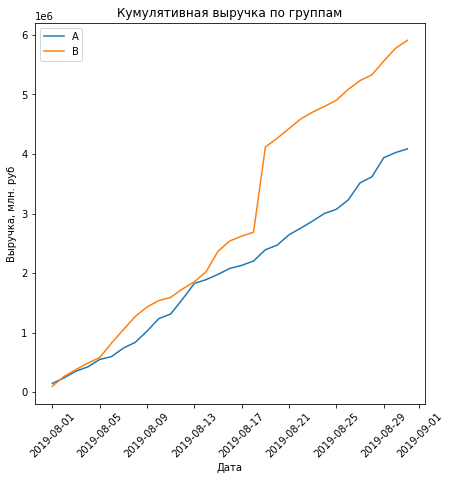

In [16]:
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(7, 7))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн. руб')
plt.xticks(rotation=45) 

plt.legend()
plt.show()

По "неочищенным" данным группа B лидирует по кумулятивной выручке.

### **Кумулятивный средний чек по группам.**
<a id='section_4'></a>

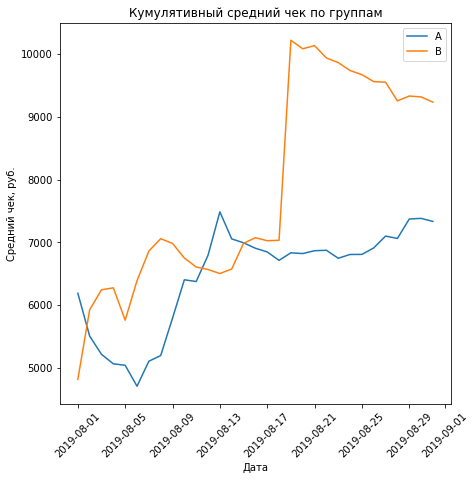

In [17]:
plt.figure(figsize=(7, 7))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')

plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб.')
plt.xticks(rotation=45) 

plt.legend()
plt.show()

По "неочищенным" данным показатель среднего чека по сегментам сильно колеблется.

### **Изменения кумулятивного среднего чека группы B к группе A.**
<a id='section_5'></a>

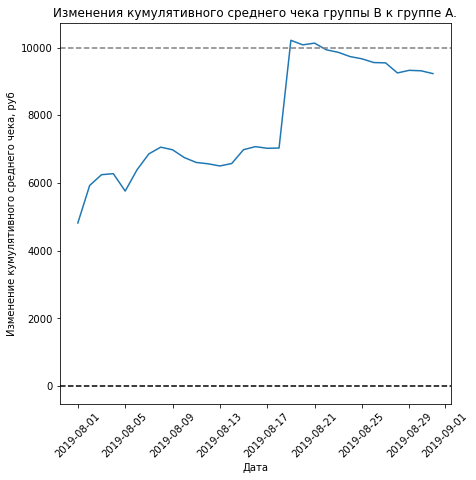

In [18]:
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(7, 7))

plt.plot(
    merged_cumulative_revenue['date'],
    (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['revenueA'])-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=10000, color='grey', linestyle='--')

plt.title('Изменения кумулятивного среднего чека группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного среднего чека, руб')
plt.xticks(rotation=45) 

plt.show()

Судя по графику кумулятивного среднего чека группа B лидирует по этому показателю, но есть значительные вариации, на которые влияют, вероятно, аномально крупные заказы.

### **Кумулятивная конверсия.**
<a id='section_6'></a>

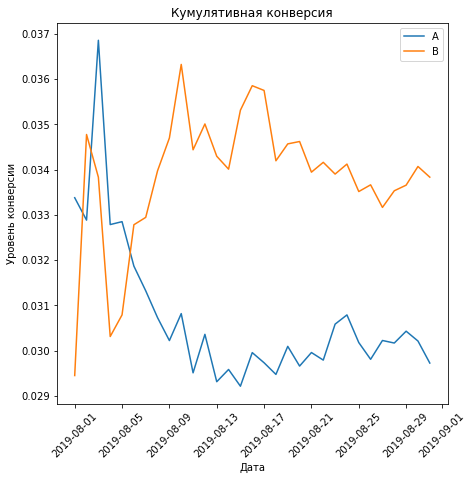

In [19]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

plt.figure(figsize=(7, 7))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.title('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.ylabel('Уровень конверсии')
plt.xticks(rotation=45) 

plt.legend()
plt.show()

По "неочищенным" данным в начале теста конверсия группы B была ниже, но к концу изучаемого периода стала выше, чем в группе А. 

### **График относительного изменения кумулятивной конверсии группы B к группе A.**
<a id='section_7'></a>

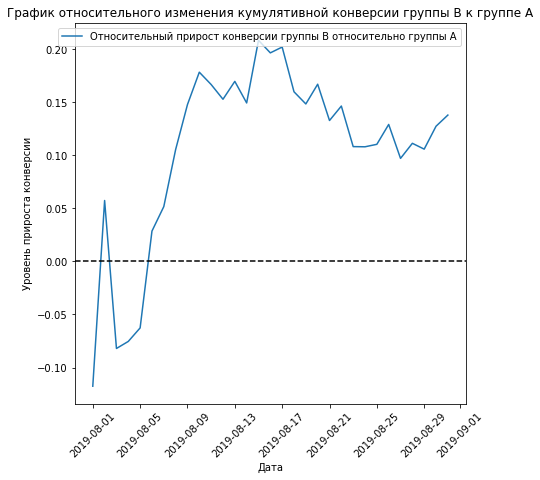

In [20]:
merged_cumulative_conversions = cumulative_data_a[['date', 'conversion']].merge(
    cumulative_data_b[['date', 'conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)

plt.figure(figsize=(7, 7))
plt.plot(
    merged_cumulative_conversions['date'],
    merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1,
    label='Относительный прирост конверсии группы В относительно группы А'
)

plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Уровень прироста конверсии')
plt.xticks(rotation=45) 

plt.legend()
plt.show()

Данный график отражает вывод предыдущего пункта: в группе В конверсия на протяжении теста становилась лучше. 

### **Точечный график количества заказов по пользователям.**
<a id='section_8'></a>

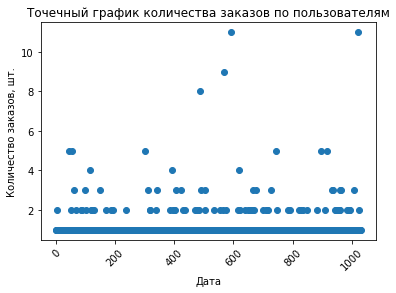

In [21]:
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

orders_by_users.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0, len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Дата')
plt.ylabel('Количество заказов, шт.')
plt.xticks(rotation=45) 

plt.show()

Большинство пользователей сделало заказ 1 раз.

### **95-й и 99-й перцентили количества заказов на пользователя.**
<a id='section_9'></a>

In [22]:
conversion_percentile = np.percentile(orders_by_users['orders'], [95, 99])
conversion_percentile

array([2., 4.])

Не более 5 % пользователей совершали больше двух заказов.   
и не более одного процента пользователей - больше четырёх заказов.

### **Точечный график стоимостей заказов.**
<a id='section_10'></a>

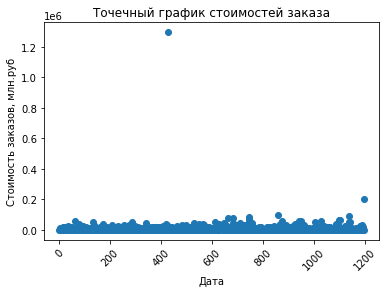

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказа')
plt.xlabel('Дата')
plt.ylabel('Стоимость заказов, млн.руб')
plt.xticks(rotation=45) 

plt.show()

По стоимости заказа есть всего 2 выброса больше 200 тысяч рублей. Самый дорогой заказ мог повлиять на рассчёт показателей по "неочищенным" данным и привести к неверным выводам.

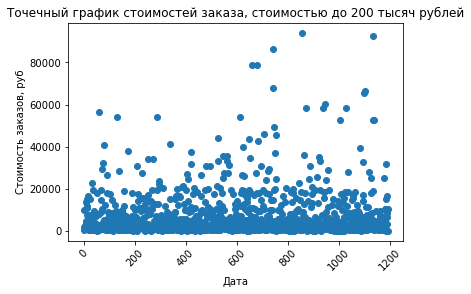

In [24]:
orders_till_200000 = orders[orders['revenue'] <= 200000]

x_values = pd.Series(range(0, len(orders_till_200000['revenue'])))

plt.scatter(x_values, orders_till_200000['revenue'])

plt.title('Точечный график стоимостей заказа, стоимостью до 200 тысяч рублей')
plt.xlabel('Дата')
plt.ylabel('Стоимость заказов, руб')
plt.xticks(rotation=45) 

plt.show()

### **95-й и 99-й перцентили стоимости заказов.**
<a id='section_11'></a>

In [25]:
costs_percentile = np.percentile(orders['revenue'], [95, 99])
costs_percentile

array([28000. , 58233.2])

Не больше 5 % пользователей сделали заказы стоимостью свыше 20 тысяч. Не более одного процента - стоимостью выше 58 233 тысячи.

### **Статистическая значимость различий в конверсии между группами по «сырым» данным.**
<a id='section_12'></a>

H0: различий в конверсии между группами нет.

H1: различия в конверсии между группами есть.

Уровень значимости - 5 %.

In [26]:
orders_by_users_a =(
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitorId', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitorId', 'orders']

sample_a = pd.concat([orders_by_users_a['orders'], pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_a['orders'])), name='orders')], axis=0)
sample_b = pd.concat([orders_by_users_b['orders'], pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_b['orders'])), name='orders')], axis=0)

print('P-value =', "{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print('Относительный прирост конверсии группы B к конверсии группы А равен',"{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

P-value = 0.017
Относительный прирост конверсии группы B к конверсии группы А равен 0.138


P-value меньше 0.05, следовательно отвергаем нулевую гипотезу. Анализ "неочищенных данных" свидетельствует, что в конверсии между группами есть статистически значимые различия.    

### **Статистическая значимость различий в среднем чеке между группами по «сырым» данным.**
<a id='section_13'></a>

H0: различий в среднем чеке между группами нет.

H1: различия в среднем чеке между группами есть.

Уровень значимости - 5 %.

In [27]:
print("P-value = "'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

print('Относительное различие среднего чека между сегментами - ''{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

P-value = 0.729
Относительное различие среднего чека между сегментами - 0.259


P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет.    

### **Статистическая значимость различий в конверсии между группами по «очищенным» данным.**
<a id='section_14'></a>

H0: различий в конверсии между группами нет.

H1: различия в конверсии между группами есть.

Уровень значимости - 5 %.

In [28]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > conversion_percentile[0]]['visitorId'],
        orders_by_users_b[orders_by_users_b['orders'] > conversion_percentile[0]]['visitorId']
    ],
    axis=0
)

users_with_expensive_orders = orders[orders['revenue'] > costs_percentile[1]]['visitorId']

ab_normal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitorId'].isin(ab_normal_users))
        ]['orders'],
        pd.Series(
        0,
        index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])),
        name='orders'
        ),
    ],
    axis=0
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitorId'].isin(ab_normal_users))
        ]['orders'],
        pd.Series(
        0,
        index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])),
        name='orders'),
    ],
    axis=0
)

print("P-value = "'{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительный прирост конверсии группы B к конверсии группы А {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

P-value = 0.010
Относительный прирост конверсии группы B к конверсии группы А 0.174


По "очищенным" данным P-value меньше 0.05, следовательно отвергаем нулевую гипотезу, в конверсии между группами есть статистически значимые различия.    
Относительный прирост конверсии группы B к конверсии группы А больше чем в "неочищенных" данных и равен 17.4 %.

### **Статистическая значимость различий в среднем чеке между группами по «очищенным» данным.**
<a id='section_15'></a>

H0: различий в среднем чеке между группами нет.

H1: различия в среднем чеке между группами есть.

Уровень значимости - 5 %.

In [29]:
print('P-value = {0:.3f}'.format(
        stats.mannwhitneyu(orders[
                np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(ab_normal_users)),
                )
            ]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(ab_normal_users)),
                )
            ]['revenue'])[1]))

print('Относительное различие среднего чека между сегментами {0:.3f}'.format(
        orders[np.logical_and(orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(ab_normal_users)),
        )
        ]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(ab_normal_users)),
        )
        ]['revenue'].mean()-1)
)

P-value = 0.798
Относительное различие среднего чека между сегментами -0.020


По "очищенным" данням P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет.    
Относительное различие среднего чека между сегментами - 2 %. После удаления выбросов оказалось, что средний чек в группе А больше на 2 %.

### **Выводы, рекомендации.**
<a id='section_16'></a>

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. 

- По "сырым" и "очищенным" данным нет статистически значимых отличий по среднему чеку между группами.

- По графику конверсии результаты группы B лучше, но имеются значительные колебания.    

- График различия среднего чека положителен, но не имеет стабильной тенденции к росту.   

Рекомендации: продолжить тест, чтобы удостовериться, что конверсия группы В стабильно лучше. 